In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 - Twitter API Authorization

In [ ]:
import tweepy
import sys
import csv
import time

In [2]:
consumer_key = "uUD5gEyrQx0CDfQ7pjzsrABjb"
consumer_secret = "Gmz3gNv5FG52Y2f2xE9Nmx1cU5EZZJrxXwr03RyVphyw4DLavl"
access_token = "1547323880-ESPqufpNIBRIbJayqtGoFhkbD2TVeC1OfsWc7fU"
access_token_secret = "30XYAnJbesYSYT6hehQzJLLRRhz2OU5BO7eTz8YJeqm7C"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

check [tweepy API](http://tweepy.readthedocs.io/en/v3.5.0/api.html).

- `api.user_timeline`: return my tweets
- `api.home_timeline`: return tweets on my home page
- `items()`, `pages()`: are iterable. 

In [ ]:
for status in tweepy.Cursor(api.home_timeline).items():
    # Process a single status
    print(status.text)

## 2 - Data Scraping

According to [Top Emojis of World Emoji Day](https://blog.emojipedia.org/top-emojis-of-world-emoji-day/), we will only search for tweets with the top 9 emojis. If there are two emojis, we will .... Refer to [here](https://unicode.org/emoji/charts/full-emoji-list.html) for unicode.
- 😂 Face With Tears Of Joy:     $\qquad$ `0` - U+1F602
- 😍 Smiling Face With Heart-Eyes: 
- ❤️ Red heart
- 😀 Grinning Face: $\quad$ `1` - U+1F600
- 😎 Smiling Face With Sunglasses
- 🎉 Party Popper: $\qquad$ `2` - U+1F389
- 😊 Smiling Face With Smiling Eyes
- 👍 Thumbs Up: $\qquad$ `3` - U+1F44D
- 💩 Pile Of Poo: $\quad$ `4` - U+1F4A9

I could also extract tweets for bigger categories of emoji, but the procedure is very similar. In this project I will select the above five emojis with the labels in shaded fonts for a test run of the sentiment analysis.

### 2.1 - No stream

In [ ]:
query = [u"\U0001F602",u"\U0001F600",u"\U0001F389",u"\U0001F44D",u"\U0001F4A9"]

idx = 1

api = tweepy.API(auth)
search = tweepy.Cursor(api.search, q=query[idx],lang = 'en').items()
filename = 'emoji_nostream_' + str(idx) + '.csv'

with open(filename,'a',newline='\n') as f:
    writer = csv.DictWriter(f,fieldnames=['tweet','label'])
    writer.writeheader()
    for tweet in search:
        text = tweet.text        
        if query[idx] in text and (not tweet.retweeted):# and ('RT @' not in tweet.text):
            writer.writerow({'tweet':text,'label':idx}) 

#query = 'quantum'
query = [u"\U0001F602",u"\U0001F600",u"\U0001F389",u"\U0001F44D",u"\U0001F4A9"]

idx = 1

api = tweepy.API(auth)
search = tweepy.Cursor(api.search, q=query[idx],lang = 'en').items()
filename = 'emoji_nostream_' + str(idx) + '.csv'

with open(filename,'a',newline='\n') as f:
    writer = csv.DictWriter(f,fieldnames=['tweet','label'])
    writer.writeheader()
    for tweet in search:
        text = tweet.text        
        if query[idx] in text and (not tweet.retweeted):# and ('RT @' not in tweet.text):
            writer.writerow({'tweet':text,'label':idx}) 

In [68]:
df = pd.read_csv(filename)
df.head()

,tweet,label
0,@JensenAckles \n😀HAPPY 14 !!!!!!!!!!!!!!!!!!👍👌...,1
1,Puppy sitting Rumi tonight! Great way to end a...,1
2,RT @20KD18: Good Day Everyone 😀 May I ask a li...,1
3,Habby Birzday @Pali_Mudda 🤓 thanks for sharing...,1
4,"RT @Rohandinho_: Barca, Real, Bayern, Man City...",1


In [60]:
df.shape

(2132, 2)

### 2.2 - Stream

Click [here](https://developer.twitter.com/en/docs/tweets/filter-realtime/guides/basic-stream-parameters) for Standard streaming API request parameters. The github is [here](https://github.com/tweepy/tweepy/blob/v3.4.0/tweepy/streaming.py).

### 2.3 - Concatenation

In [85]:
filenames = ['emoji_nostream_' + str(idx) + '.csv' for idx in range(5)]
dfs = [pd.read_csv(filename) for filename in filenames]
for i in range(5):
    print('df{}.shape= '.format(i), dfs[i].shape)

df0.shape=  (2376, 2)
df1.shape=  (1886, 2)
df2.shape=  (4607, 2)
df3.shape=  (1860, 2)
df4.shape=  (2132, 2)


[DataFrame.reset_index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html). I set drop=True to remove the old index. [DataFrame.sample](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html).

In [86]:
dfs[2] = dfs[2].sample(frac=0.5,random_state=99).reset_index(drop=True)
for i in range(5):
    print('length of df{} ='.format(i),len(dfs[i]))

length of df0 = 2376
length of df1 = 1886
length of df2 = 2304
length of df3 = 1860
length of df4 = 2132


Now the four categories have similar size. We are good to go.

In [145]:
df_raw = pd.concat(dfs)

#shuffle the row to mix the five categories
df_raw = df_raw.sample(frac=1,random_state=99).reset_index(drop=True)
df_raw.head()

,tweet,label
0,"RT @denmatai190: | 👑411K FOLLOWERS!!!👑\n|∧∧""""\...",3
1,"@6CentsRose My nieces and nephews were young, ...",1
2,@HobiLove94 Happy Birthday 🎉🎈,2
3,@bravoholclique Me! I never get a chance to wa...,1
4,RT @RoanhorseBex: 🎉ANNOUNCEMENT🎉That Anasazi-i...,2


In [146]:
df_raw.shape

(10558, 2)

In [147]:
df_raw.iloc[0].tweet

'RT @denmatai190: | 👑411K FOLLOWERS!!!👑\n|∧∧""\n| * ¯ ³¯)Chu💕Makina Yui🎥💘\n|⊂ノ\u3000\u3000\u3000\u3000  \n \nTHANK YOU GUYS SO MUCH😉👍\n\n👏WeAllLovePorn👏 https://t.co/P…'

## 3 - data cleaning

**to-do list:**
- `duplicates`: there should be some tweets with more than one emoji, I will drop them all duplicate occurences. 
- `#hashtag`: I will keep them because it's likely they convey useful messages. **I have delete them below, take them back?**
- `@username`, `emoji`, `punctuations`, `r'https?://'`: drop all non-alphanumeric symbols `\W`
- convert to `lowercase`
- `tense`, `plurals`
- deal with words such as 'sooooo'
- get rid of 'an','the', etc

I will be using python3 [regex](https://docs.python.org/3.4/library/re.html).

https://web.stanford.edu/~jesszhao/files/twitterSentiment.pdf

https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90

In [204]:
df_raw.head(10)

,tweet,label
0,"RT @denmatai190: | 👑411K FOLLOWERS!!!👑\n|∧∧""""\...",3
1,"@6CentsRose My nieces and nephews were young, ...",1
2,@HobiLove94 Happy Birthday 🎉🎈,2
3,@bravoholclique Me! I never get a chance to wa...,1
4,RT @RoanhorseBex: 🎉ANNOUNCEMENT🎉That Anasazi-i...,2
5,@bankkroll_ 😂😂😂 you shoulda got footage,0
6,RT @Monica_Sheehan: @AtxJecklinx happy birthda...,2
7,RT @YuhboyYsn: New shit 🔥🔥🔥🔥 or 💩💩💩💩? https://...,4
8,@yaboy_jody I just had to know that 💩 look sus...,4
9,@BroadwayBillLee @WCBSFM Absolute class 👍 👍 👍,3


### 3.1 - Duplicates

In [283]:
# check duplicates
df_raw.tweet.duplicated().value_counts()

False    7666
True     2892
Name: tweet, dtype: int64

[DataFrame.drop_duplicates](http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html): the default for `keep` is `'first'`, which means drop duplicates except the first occurence. I will drop all occurences, so `keep=False`. 

In [284]:
df = df_raw.drop_duplicates(['tweet'],keep=False)

print(df.tweet.duplicated().value_counts())
df.label.value_counts(normalize=True)

False    7066
Name: tweet, dtype: int64


0    0.236202
4    0.221059
1    0.207897
3    0.173224
2    0.161619
Name: label, dtype: float64

### 3.1 - hashtag, @, 'http://'

In [285]:
df1 = df.copy()

In [297]:
df_raw['tweet'].str.count(r'#\S*').sum()

4858

In [164]:
df_raw['tweet'].str.count(r'https://').sum()

5124

In [166]:
df_raw['tweet'].str.count(r'http://').sum()

4

In [167]:
df_raw['tweet'].str.count(r'^ *RT').sum()

5249

In [168]:
df_raw['tweet'].str.count(r'@[a-zA-Z0-9_]+').sum()

13638

In [286]:
# remove the leading 'RT'
df1['tweet'] = df['tweet'].str.replace(r'^ *RT ', ' ')
print(df1['tweet'].str.count(r'^ *RT').sum())
df1.head()

0


,tweet,label
0,"@denmatai190: | 👑411K FOLLOWERS!!!👑\n|∧∧""""\n|...",3
1,"@6CentsRose My nieces and nephews were young, ...",1
2,@HobiLove94 Happy Birthday 🎉🎈,2
3,@bravoholclique Me! I never get a chance to wa...,1
4,@RoanhorseBex: 🎉ANNOUNCEMENT🎉That Anasazi-ins...,2


In [287]:
# remove @
df1['tweet'] = df1['tweet'].str.replace(r'@[a-zA-Z0-9_]+', ' ')
print(df1.tweet.str.count(r'@[a-zA-Z0-9_]+').sum())
df1.head()

0


,tweet,label
0,": | 👑411K FOLLOWERS!!!👑\n|∧∧""""\n| * ¯ ³¯)Chu...",3
1,"My nieces and nephews were young, so it was ...",1
2,Happy Birthday 🎉🎈,2
3,Me! I never get a chance to watch it live! 😀,1
4,: 🎉ANNOUNCEMENT🎉That Anasazi-inspired epic f...,2


In [294]:
# remove hashtag
df1['tweet'] = df1['tweet'].str.replace(r'#\S*', ' ')
print(df1.tweet.str.count(r'@[a-zA-Z0-9_]+').sum())
df1.head()

0


,tweet,label
0,411k followers chu m...,3
1,my nieces and nephews were young so it was ...,1
2,happy birthday,2
3,me i never get a chance to watch it live,1
4,announcement that anasazi inspired epic f...,2


In [288]:
# remove http:// and https://
df1['tweet'] = df1['tweet'].str.replace(r'https?://[a-zA-Z0-9/\.]*', ' ')
print(df1['tweet'].str.count(r'https://[a-zA-Z0-9_]*').sum())
df1.tweet.head(10)

0


0       : | 👑411K FOLLOWERS!!!👑\n|∧∧""\n| * ¯ ³¯)Chu...
1       My nieces and nephews were young, so it was ...
2                                     Happy Birthday 🎉🎈
3          Me! I never get a chance to watch it live! 😀
4       : 🎉ANNOUNCEMENT🎉That Anasazi-inspired epic f...
5                           😂😂😂 you shoulda got footage
6                              :   happy birthday!!!🎉🎂🎁
8         I just had to know that 💩 look sus as hell 😂😂
9                                  Absolute class 👍 👍 👍
10    The CW officially renewed Supernatural! There’...
Name: tweet, dtype: object

In [289]:
# remove emoji

# https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
pattern = "["u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"u"\U0001F1E0-\U0001F1FF""]+"
df1['tweet']= df1['tweet'].str.replace(pattern,' ')
df1.head(10)

,tweet,label
0,": | 411K FOLLOWERS!!! \n|∧∧""""\n| * ¯ ³¯)Chu...",3
1,"My nieces and nephews were young, so it was ...",1
2,Happy Birthday,2
3,Me! I never get a chance to watch it live!,1
4,: ANNOUNCEMENT That Anasazi-inspired epic f...,2
5,you shoulda got footage,0
6,: happy birthday!!!,2
8,I just had to know that look sus as hell,4
9,Absolute class,3
10,The CW officially renewed Supernatural! There’...,2


In [290]:
# I decide to remove all non alphanumeric characters

df1['tweet']= df1['tweet'].str.replace(r'[^a-zA-Z0-9]',' ')
df1.tweet.head(10)

0            411K FOLLOWERS                    Chu M...
1       My nieces and nephews were young  so it was ...
2                                      Happy Birthday  
3          Me  I never get a chance to watch it live   
4          ANNOUNCEMENT That Anasazi inspired epic f...
5                               you shoulda got footage
6                                    happy birthday    
8          I just had to know that   look sus as hell  
9                                  Absolute class      
10    The CW officially renewed Supernatural  There ...
Name: tweet, dtype: object

In [291]:
# convert to lowercase

df1['tweet']= df1['tweet'].str.lower()
df1.tweet.head(10)

0            411k followers                    chu m...
1       my nieces and nephews were young  so it was ...
2                                      happy birthday  
3          me  i never get a chance to watch it live   
4          announcement that anasazi inspired epic f...
5                               you shoulda got footage
6                                    happy birthday    
8          i just had to know that   look sus as hell  
9                                  absolute class      
10    the cw officially renewed supernatural  there ...
Name: tweet, dtype: object

In [304]:
# remove extra white space characters

df1['tweet'] = df1['tweet'].apply(lambda x: ' '.join(x.split()))
df1['tweet'].head()

0    411k followers chu makina yui thank you guys s...
1    my nieces and nephews were young so it was my ...
2                                       happy birthday
3             me i never get a chance to watch it live
4    announcement that anasazi inspired epic fantas...
Name: tweet, dtype: object

In [310]:
idx = 99
print(df_raw.tweet[idx],'\n',df1.tweet[idx], '\n','LABEL= ',df1.label[idx])

RT @mozilla: Twenty years! 🎂 🎉

It’s been two decades since we first logged on as the Mozilla project and got started bringing together the… 
 twenty years it s been two decades since we first logged on as the mozilla project and got started bringing together the 
 LABEL=  2


In [320]:
query = [u"\U0001F602",u"\U0001F600",u"\U0001F389",u"\U0001F44D",u"\U0001F4A9"]
print(query)
df1['emoji'] = df1['label'].apply(lambda i: query[int(i)])
df1.head()

['😂', '😀', '🎉', '👍', '💩']


,tweet,label,emoji
0,411k followers chu makina yui thank you guys s...,3,👍
1,my nieces and nephews were young so it was my ...,1,😀
2,happy birthday,2,🎉
3,me i never get a chance to watch it live,1,😀
4,announcement that anasazi inspired epic fantas...,2,🎉


In [330]:
df1['label'] = df1['label'].apply(lambda i: int(i))

In [331]:
df1.to_csv('emoji.csv')

## 4 - Model

In [332]:
# train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1,test_size=0.2,random_state=99)
train.shape

(5652, 3)

In [333]:
trainX, trainY = train['tweet'], train['label']
testX, testY = test['tweet'], test['label']

### 4.x - kNN

In this subsection, I will use TF-IDF to implement a kNN alogrithm for our text classification, as introduced in [Procedia Engineering 69 (2014) 1356](https://www.sciencedirect.com/science/article/pii/S1877705814003750).

In [368]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [370]:
vect = TfidfVectorizer(
#                ngram_range = (1,4),
                stop_words = 'english',
                smooth_idf = 1,
            )

# sparse matrix for NB Classifier
train_matrix = vect.fit_transform(trainX)
test_matrix = vect.transform(testX)

In [376]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_matrix,trainY)
train_pred = knn.predict(train_matrix)
test_pred = knn.predict(test_matrix)

In [378]:
print((train_pred == trainY).value_counts(normalize=True))
print((test_pred == testY).value_counts(normalize=True))

True     0.973284
False    0.026716
Name: label, dtype: float64
False    0.628713
True     0.371287
Name: label, dtype: float64


In [395]:
k_range = range(1,20)
scores = []

# find the best k value in k_range
for k in k_range:
    print("k = " + str(k) + " begin ")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_matrix,trainY)
    test_pred = knn.predict(test_matrix)
    acc = (test_pred == testY).value_counts(normalize=True)
    accuracy = acc.loc[True]
    scores.append(accuracy)
    end = time.time()
    print("Complete time: " + str(end-start) + " Secs.")

k = 1 begin 
Complete time: 0.08072710037231445 Secs.
k = 2 begin 
Complete time: 0.0893869400024414 Secs.
k = 3 begin 
Complete time: 0.0896751880645752 Secs.
k = 4 begin 
Complete time: 0.13209295272827148 Secs.
k = 5 begin 
Complete time: 0.12654685974121094 Secs.
k = 6 begin 
Complete time: 0.13172221183776855 Secs.
k = 7 begin 
Complete time: 0.13521790504455566 Secs.
k = 8 begin 
Complete time: 0.13333773612976074 Secs.
k = 9 begin 
Complete time: 0.1436319351196289 Secs.
k = 10 begin 
Complete time: 0.13260579109191895 Secs.
k = 11 begin 
Complete time: 0.1292128562927246 Secs.
k = 12 begin 
Complete time: 0.1297762393951416 Secs.
k = 13 begin 
Complete time: 0.1320171356201172 Secs.
k = 14 begin 
Complete time: 0.13101410865783691 Secs.
k = 15 begin 
Complete time: 0.1387951374053955 Secs.
k = 16 begin 
Complete time: 0.13049721717834473 Secs.
k = 17 begin 
Complete time: 0.1322188377380371 Secs.
k = 18 begin 
Complete time: 0.13017487525939941 Secs.
k = 19 begin 
Complete time

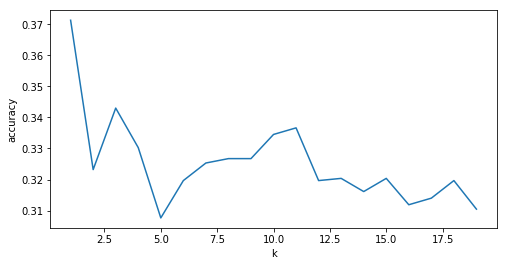

In [403]:
k_range = range(1,20)
plt.figure(figsize=(8,4))
plt.plot(k_range,scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

Using kNN, the accuracy on test set can reaches **34%**.

### 4.1 - Naive Bayes
why multinomial NB?

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [341]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
#                ngram_range = (1,4),
                stop_words = 'english',
                smooth_idf = 1,
            )

# sparse matrix for NB Classifier
train_matrix = vectorizer.fit_transform(trainX)
test_matrix = vectorizer.transform(testX)
print(vectorizer.vocabulary_)
print(train_matrix)

{'likewise': 4671, 'bro': 1277, 'happy': 3638, 'birthday': 1063, 'hope': 3864, 'good': 3436, 'day': 2164, 'vintage': 8417, 'board': 1129, 'games': 3287, 'vinyl': 8418, 'record': 6469, 'albums': 499, 'middle': 5115, 'finger': 3056, 'looks': 4773, 'like': 4667, 'sausage': 6834, 'yo': 8860, 'porto': 6107, 'really': 6452, 'lost': 4791, 'belenenses': 981, 'beat': 951, 'luz': 4853, 'rumoaopenta': 6753, 'abenfica': 350, 'love': 4803, 'guys': 3572, 'btw': 1319, 'new': 5451, 'england': 2714, 'narragansett': 5372, 'rhode': 6635, 'island': 4180, 'ya': 8791, 'gal': 3278, 'bagged': 857, 'hersen': 3763, 'job': 4285, 'trial': 8111, 'crap': 1994, 'people': 5910, 'little': 4703, 'dramatic': 2496, 'yeah': 8823, 'picked': 5972, 'duke': 2553, 'nova': 5556, 'kansas': 4362, 'got': 3462, 'blown': 1118, 'foh': 3118, 'real': 6444, 'pc': 5878, 'casually': 1492, 'meet': 5036, 'joe': 4287, 'morgan': 5239, 'elevator': 2655, 'hotel': 3885, 'staying': 7484, 'looool': 4775, 'thought': 7924, 'slick': 7200, 'praying': 

[sklearn.naive_bayes.MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

In [ ]:
clf_NB = MultinomialNB()
clf_NB.fit(train_matrix, trainY)

In [354]:
cross_val = cross_val_score(clf_NB, train_matrix,trainY, cv = 5, scoring= 'accuracy')
print(cross_val)
print ("mean score for 10-fold cross validation: ", np.mean(cross_val))

[0.50795053 0.50132626 0.48275862 0.48318584 0.4964539 ]
mean score for 10-fold cross validation:  0.49433503041782495


In [357]:
# accuracy on training set

pred_train = clf_NB.predict(train_matrix)
(pred_train==trainY).value_counts(normalize=True)

True     0.835633
False    0.164367
Name: label, dtype: float64

In [355]:
# accuracy on test set

pred = clf_NB.predict(test_matrix)
(pred==testY).value_counts(normalize=True)

True     0.500707
False    0.499293
Name: label, dtype: float64

In [350]:
# confusion matrix

print('The confusion matrix:\n',confusion_matrix(testY,pred))

The confusion matrix:
 [[224  40   8  14  68]
 [ 96  97  24  27  42]
 [ 25  32 158   5   8]
 [ 67  63  17  52  31]
 [ 83  34  10  12 177]]


In [367]:
# comare with CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer1 = CountVectorizer()

data_train_count = vectorizer1.fit_transform(trainX)
data_test_count  = vectorizer1.transform(testX)

clf_NB1 = MultinomialNB()
clf_NB1.fit(data_train_count, trainY)

# accuracy on training set
pred_train1 = clf_NB1.predict(data_train_count)
print((pred_train1==trainY).value_counts(normalize=True))

# accuracy on test set
pred_test1 = clf_NB1.predict(data_test_count)
print((pred_test1==testY).value_counts(normalize=True))

True     0.812102
False    0.187898
Name: label, dtype: float64
True     0.507779
False    0.492221
Name: label, dtype: float64


The result of CountVectorizer() is close to that of TfidfVectorizer. On the test set, the accuracy reaches **50.8%**.

### 4.2 - SVM

### 4.x - RNN